In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

In [ ]:
d0 = pd.read_csv('sdBShortP_large_Mdotp_3_alpha_0.5_ce_applied.csv')
d1 = pd.read_csv('sdBShortP_large_Mdotp_10_alpha_0.5_ce_applied.csv')
d2 = pd.read_csv('sdBShortP_large_Mdotp_30_alpha_0.5_ce_applied.csv')
d3 = pd.read_csv('sdBShortP_large_Mdotp_100_alpha_0.5_ce_applied.csv')

d4 = pd.read_csv('sdBShortP_large_Mdotp_3_alpha_0.5_ce_applied.csv')
d5 = pd.read_csv('sdBShortP_large_Mdotp_10_alpha_0.5_ce_applied.csv')

label0 = 'MdotP = 3'
label1 = 'MdotP = 10'
label2 = 'MdotP = 30'
label3 = 'MdotP = 100'

label4 = 'MdotP = 3'
label5 = 'MdotP = 10'

In [ ]:
sel_types = ['sdB']
dsdb0 = d0[d0['product'].isin(sel_types)]
dsdb1 = d1[d1['product'].isin(sel_types)]
dsdb2 = d2[d2['product'].isin(sel_types)]
dsdb3 = d3[d3['product'].isin(sel_types)]

dsdb4 = d4[d4['product'].isin(sel_types)]
dsdb5 = d5[d5['product'].isin(sel_types)]

In [ ]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.5]
labels = ['0.1', '0.3', '0.5', '0.7', '0.9', '+1.0']

dsdb0['M2_final_bin'] = pd.cut(dsdb0['M2_final'], bins=bins, labels=labels)
dsdb1['M2_final_bin'] = pd.cut(dsdb1['M2_final'], bins=bins, labels=labels)
dsdb2['M2_final_bin'] = pd.cut(dsdb2['M2_final'], bins=bins, labels=labels)
dsdb3['M2_final_bin'] = pd.cut(dsdb3['M2_final'], bins=bins, labels=labels)

dsdb4['M2_final_bin'] = pd.cut(dsdb4['M2_final'], bins=bins, labels=labels)
dsdb5['M2_final_bin'] = pd.cut(dsdb5['M2_final'], bins=bins, labels=labels)

In [ ]:
print(label0)
print(d0[(d0['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label1)
print(d1[(d1['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label2)
print(d2[(d2['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label3)
print(d3[(d3['stability'] == 'CE')]['product'].value_counts(sort=False))

MdotP = 3
sdB       236
He-WD    1663
Name: product, dtype: int64
MdotP = 10
sdB       267
He-WD    1707
HB          1
Name: product, dtype: int64
MdotP = 30
sdB       270
He-WD    1712
Name: product, dtype: int64
MdotP = 100
sdB       318
He-WD    1852
Name: product, dtype: int64


# Stability comparison

In [ ]:
data_all = pd.concat([d0, d1, d2, d3])

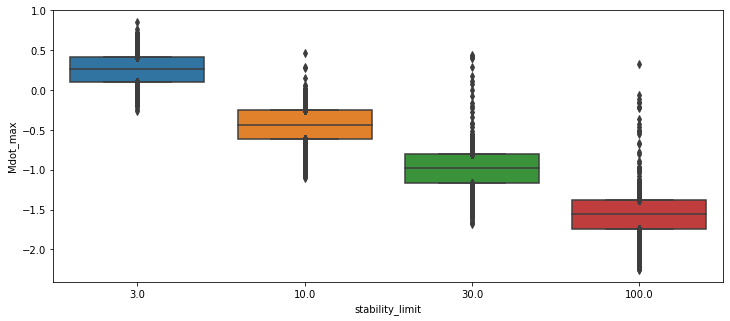

In [ ]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all[data_all['stability'] == 'CE'], whis=0)

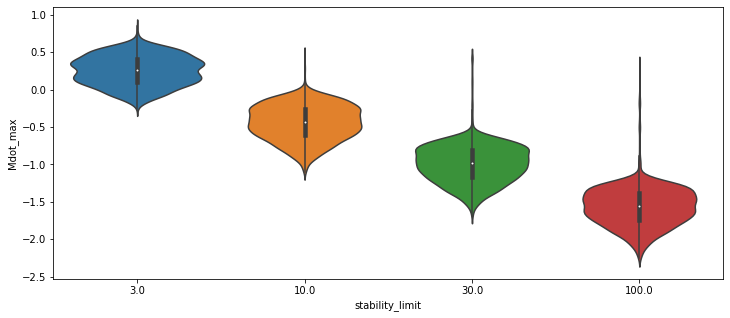

In [ ]:
pl.figure(figsize=(12, 5))
sns.violinplot('stability_limit', 'Mdot_max', data=data_all[data_all['stability'] == 'CE'])

Text(0.5, 0, 'Jdot/p stability limit')

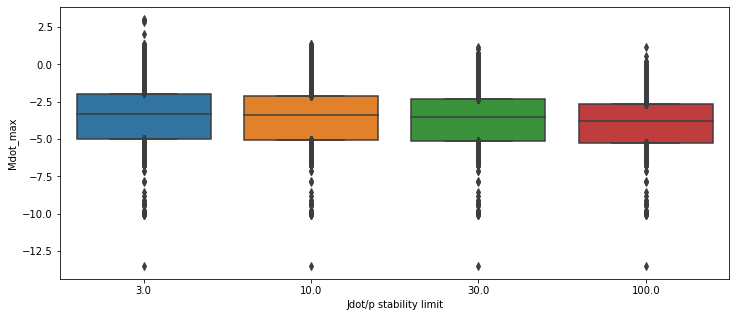

In [ ]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all[data_all['stability'] == 'stable'], whis=0)
pl.xlabel('Jdot/p stability limit')

In [ ]:
data_all_sdb = pd.concat([dsdb0, dsdb1, dsdb2, dsdb3])

Text(0.5, 0, 'Jdot/p stability limit')

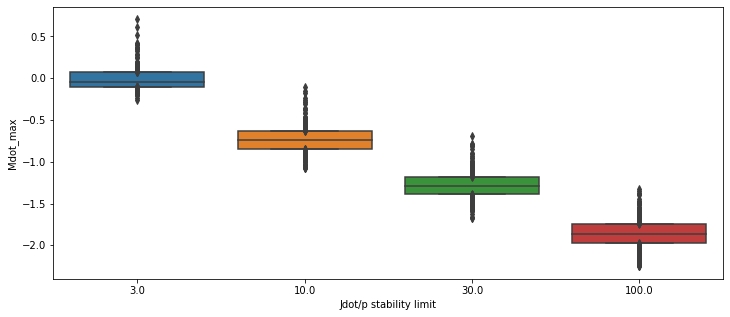

In [ ]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all_sdb[data_all_sdb['stability'] == 'CE'], whis=0)

Text(0.5, 0, 'Jdot/p stability limit')

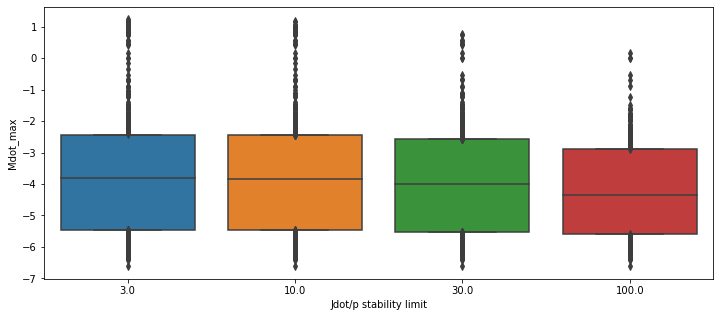

In [ ]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all_sdb[data_all_sdb['stability'] == 'stable'], whis=0)

# sdB properties

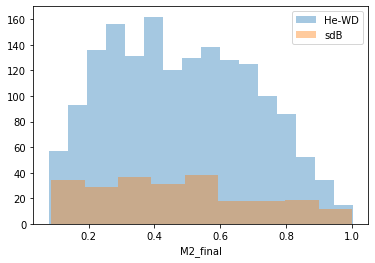

In [ ]:
sns.distplot(d0[(d0['stability'] == 'CE') & (d0['product'] == 'He-WD')]['M2_final'], kde=False, label='He-WD')
sns.distplot(d0[(d0['stability'] == 'CE') & (d0['product'] == 'sdB')]['M2_final'], kde=False, label='sdB')
pl.legend()

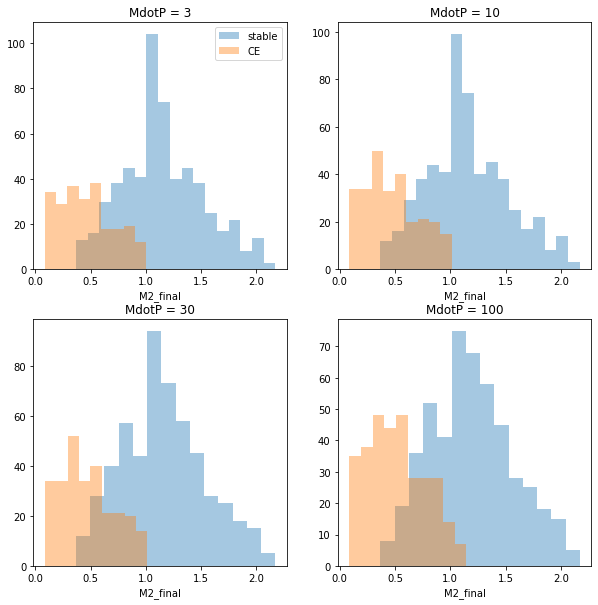

In [ ]:
def plot_dist(df):
    sns.distplot(df[df['stability'] == 'stable']['M2_final'], kde=False, label='stable')
    sns.distplot(df[df['stability'] == 'CE']['M2_final'], kde=False, label='CE')

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

No handles with labels found to put in legend.


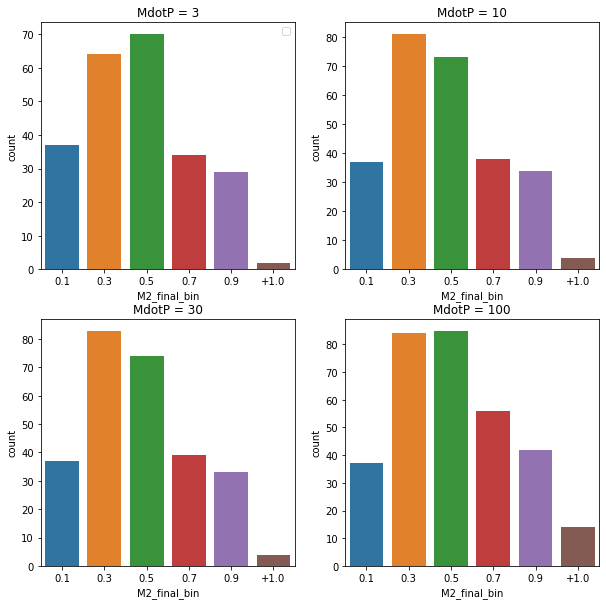

In [ ]:
def plot_dist(df):
    sns.countplot('M2_final_bin', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

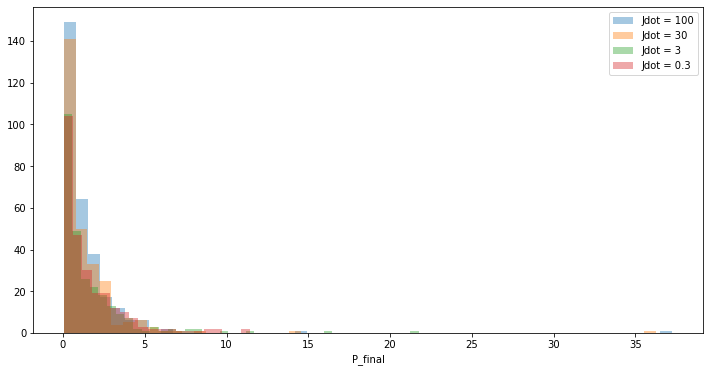

In [ ]:
def plot_dist(df, **kwargs):
    sns.distplot(df[(df['stability'] == 'CE')]['P_final'], kde=False, **kwargs)

pl.figure(1, figsize=(12, 6))
plot_dist(dsdb3, label=label4)
plot_dist(dsdb2, label=label3)
plot_dist(dsdb1, label=label2)
plot_dist(dsdb0, label=label1)
pl.legend()


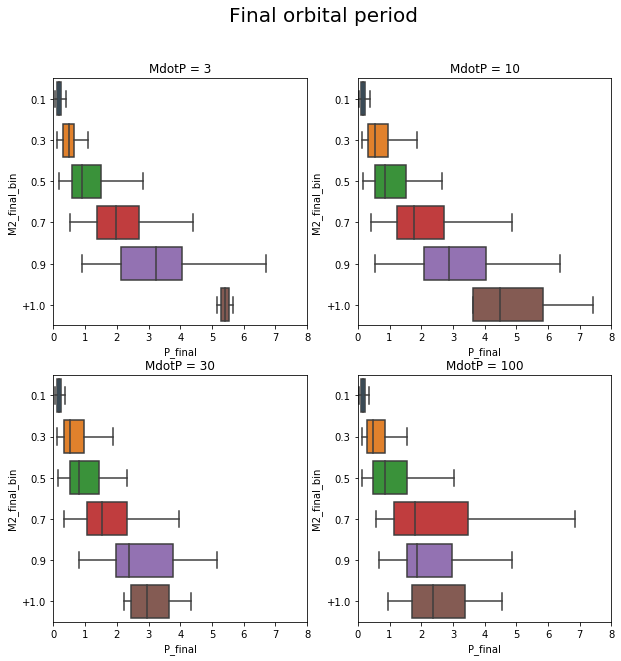

In [ ]:
def plot_dist(df):
    sns.boxplot('P_final', 'M2_final_bin', data=df[df['stability'] == 'CE'], fliersize=0)
    pl.xlim([0, 8])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Final orbital period", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)


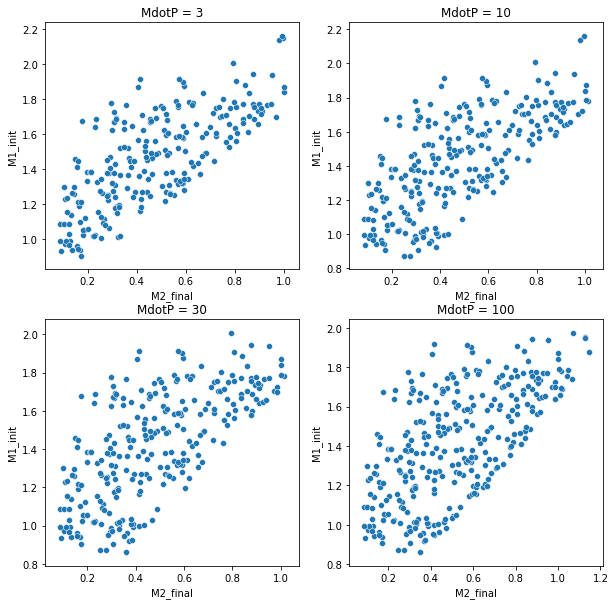

In [ ]:
def plot_dist(df):
    sns.scatterplot('M2_final', 'M1_init', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

# Relation between primary and companion during sdB phase

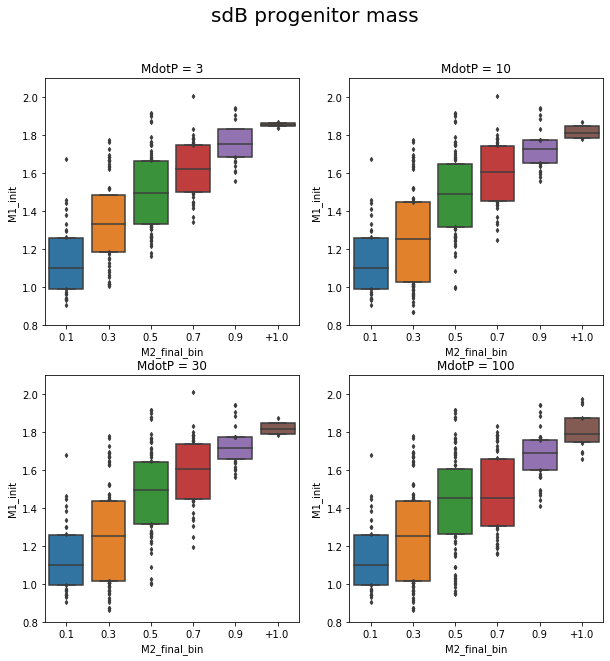

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'M1_init', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)
    pl.ylim([0.8, 2.1])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("sdB progenitor mass", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

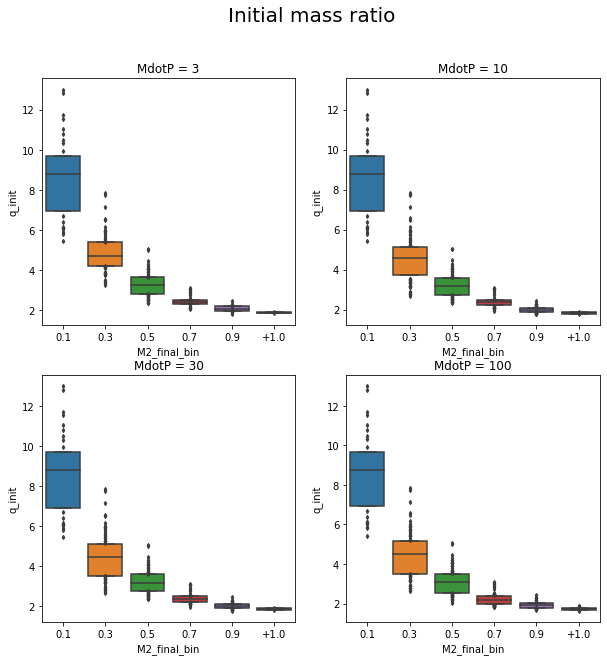

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'q_init', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Initial mass ratio", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

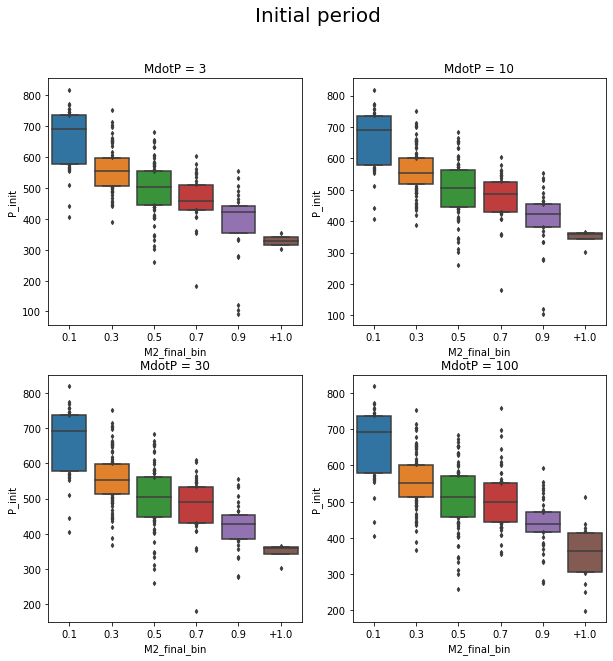

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'P_init', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Initial period", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

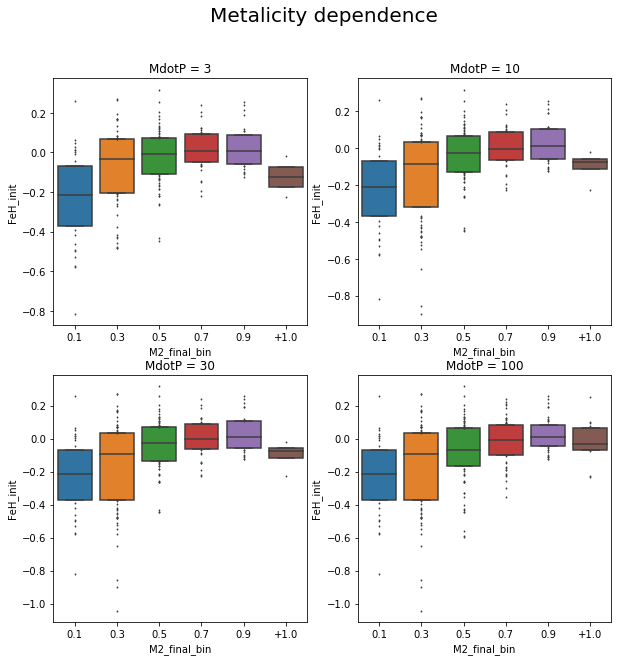

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'FeH_init', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Metalicity dependence", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

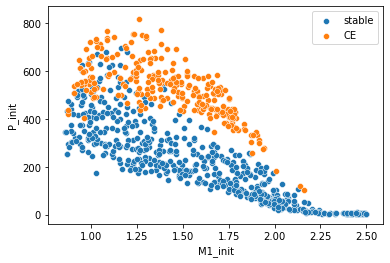

In [ ]:
sns.scatterplot('M1_init', 'P_init', data=dsdb1[dsdb1['stability'] == 'stable'], label='stable')

sns.scatterplot('M1_init', 'P_init', data=dsdb1[dsdb1['stability'] == 'CE'], label='CE')



pl.legend()

MdotP = 10


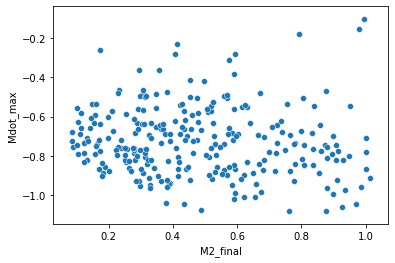

In [ ]:
sns.scatterplot('M2_final', 'Mdot_max', data=dsdb1[dsdb1['stability'] == 'CE'])
print(label1)

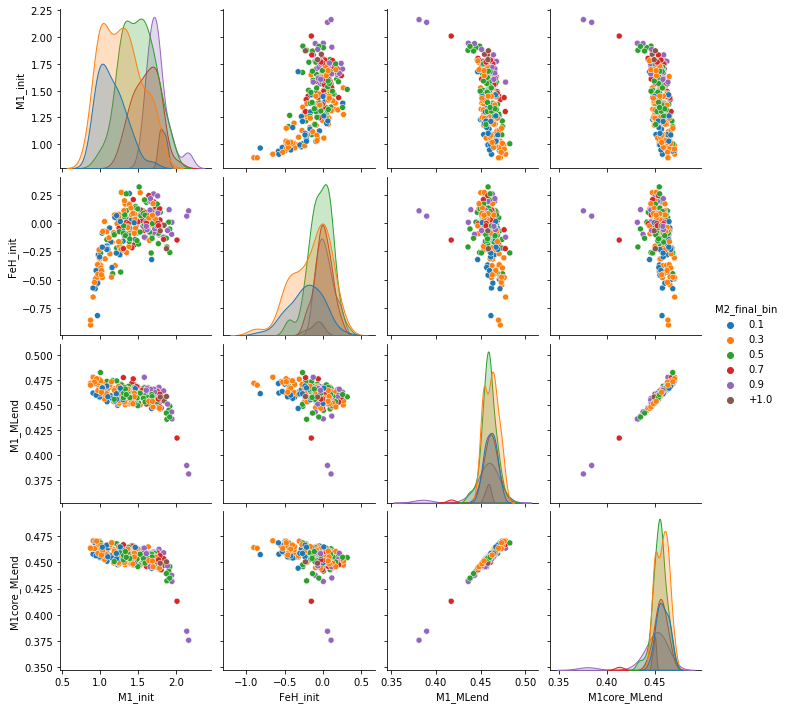

In [ ]:
sns.pairplot(data=dsdb1[dsdb1['stability'] == 'CE'], vars=['M1_init','FeH_init','M1_MLend', 'M1core_MLend'], hue='M2_final_bin')

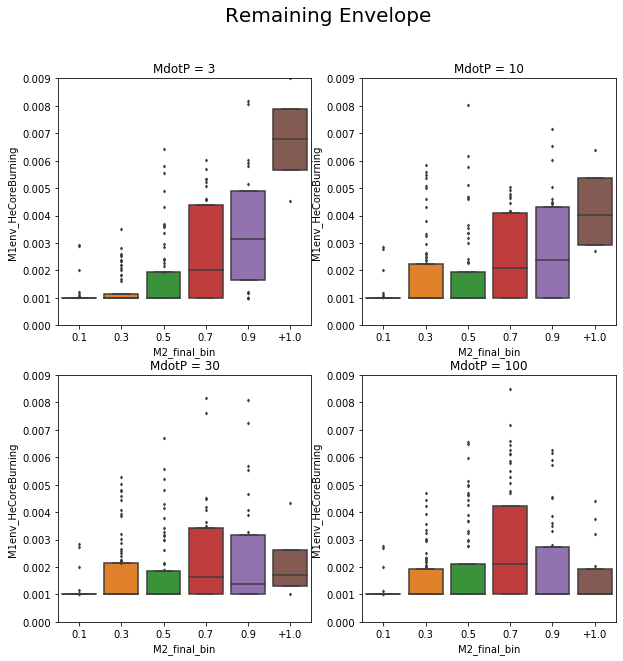

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'M1env_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=2, whis=0)
    pl.ylim([0, 0.009])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Remaining Envelope", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

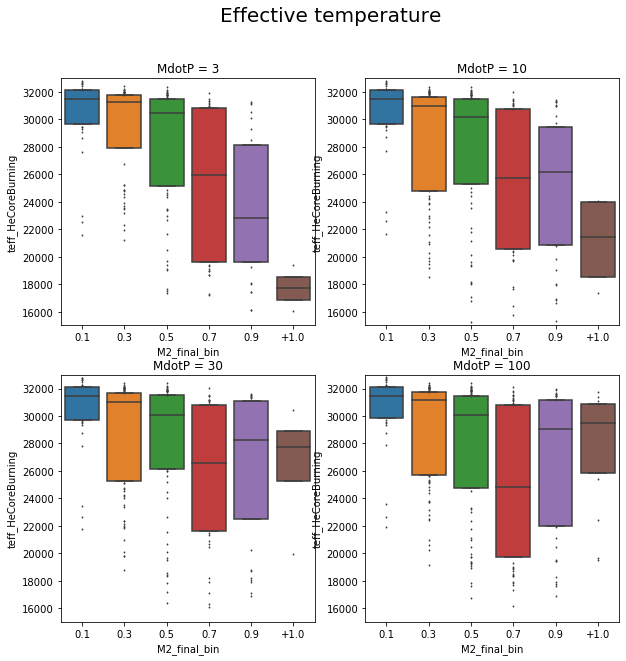

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'teff_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)
    pl.ylim([15000, 33000])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Effective temperature", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)

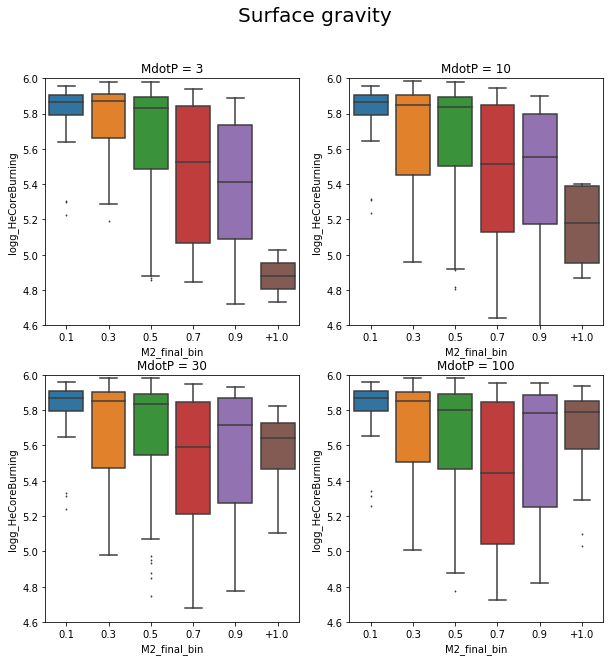

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'logg_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1)
    pl.ylim([4.6, 6.0])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Surface gravity", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label0)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label1)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label2)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label3)